In [1]:
#-----------------import statements--------------------------------------------------------------------
from collections import defaultdict 
import sys
from time import time
import networkx as nx #for display uniquely
import matplotlib.pyplot as plt

#                    Part I: GRAPH CLASS AND COMPUTING SCC'S

###                                                 GRAPH CLASS

In [3]:
class Graph: 

    def __init__(self,vertices): 
        self.V= vertices 
        self.E=0;
        self.graph = defaultdict(list) # default dictionary to store graph
        self.c=0 #cluster counter  
        self.label=[0 for i in range(vertices)]
        self.networkx_G=nx.DiGraph() 
        

    def addEdge(self,i,j): 
        self.graph[i].append(j)
        self.E+=1;
#---------------------------SCC Algo: Kosaraju----------------------------------------------------------------------
    def aux_dfs_kosaraju(self,v,visited,c): 
        print(v, end=' ')
        visited[v]= True #check off current vertex as visited and define its label, 
                        # then move on to unvisited neighbors
        self.label[v]=c
      
        for i in self.graph[v]: 
            if visited[i]==False: 
                self.aux_dfs_kosaraju(i, visited, c)

    def DFS_kosaraju(self, v, visited, stack):  # kosaraju depth first search
        #check off current vertex as visited
        
        visited[v]= True
        #Recur for all the vertices adjacent to this vertex 
        for i in self.graph[v]: 
            if visited[i]==False: 
                self.DFS_kosaraju(i, visited, stack)
        stack = stack.append(v) 

    # calculate transpose of g, needed for kosaraju
    def get_transpose(self):
        g = Graph(self.V) 
        # Recur for all the vertices adjacent to this vertex 
        for i in self.graph: 
            for j in self.graph[i]: 
                g.addEdge(j,i) 
        return g 

    def findSCCs_kosaraju(self):  # kosaraju main function
        self.c=0;
        self.label=[0 for i in range(self.V)]
      
        stack = [] 
        
        # First round of DFS
        visited =[False]*(self.V) #initialize nodes to unvisited 
        # Go through stack in order of finishing time
        for i in range(self.V): 
            if visited[i]==False: 
                self.DFS_kosaraju(i, visited, stack)
        
        # Second round of DFS (reverse direction)
        g_reversed = self.get_transpose() 
        visited =[False]*(self.V) # reinitialize nodes to unvisited 

        # iterate through nodes according to stack order
        while stack: 
            i = stack.pop() 
            if visited[i]==False:
                g_reversed.aux_dfs_kosaraju(i, visited, self.c)
                print(" ")
                self.c+=1
            
        self.label=g_reversed.label

#--------------------------------------DISPLAY---------------------------------------------------------

    def display(self,*args):
        #make networkx graph
        self.networkx_G.add_nodes_from(range(self.V))
        for i in range(self.V):
            for j in self.graph[i]:
                self.networkx_G.add_edge(i,j)

        #define display properties if they were inputted, default otherwise
        if len (args)>=2: pos=args[1]
        else: 
            pos = nx.spring_layout(self.networkx_G)
        if len(args)>=3: Node_size=args[2]
        else: Node_size=300 # default  
        if len(args)>=7: edge_width=args[6]
        else: edge_width=1 #default
        if len(args)>=8: _arrows=args[7]
        else:_arrows=True
        plt.figure()
        if len(args)>=4: plt.xlabel(args[3])
        if len(args)>=5: plt.ylabel(args[4])
        if len(args)>=6: plt.title(args[5])

        #draw graph
        nx.draw_networkx_nodes(self.networkx_G, pos,node_size=Node_size, cmap=plt.get_cmap('rainbow'), 
                       node_color = self.label)
        
        if (len(args)==0 or args[0]==True): nx.draw_networkx_labels(self.networkx_G, pos)
        nx.draw_networkx_edges(self.networkx_G,pos,arrows=_arrows,width=edge_width)
        
    
        plt.show()    

print("Graph class compiled!")



Graph class compiled!


###                                                 COMPUTING SCC'S ON SMALL EXAMPLES

G=(V,E), V=5, E=5


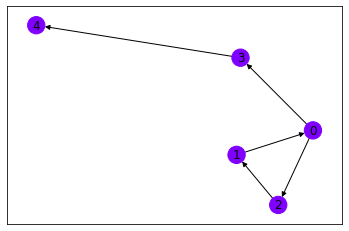

defaultdict(<class 'list'>, {1: [0], 0: [2, 3], 2: [1], 3: [4], 4: []})
Computing SCC's...
0 1 2  
3  
4  


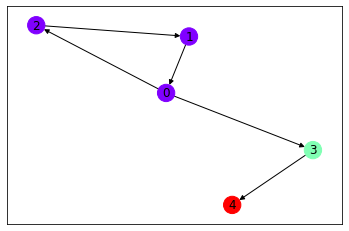


# SCC (korasaju): 3
SCC labels (korasaju): [0, 0, 0, 1, 2]

-----------------------------------------------------------
G=(V,E), V=11, E=17


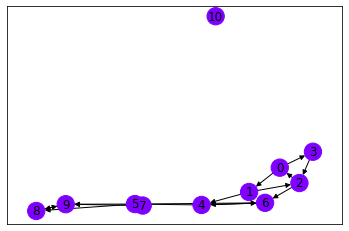

Computing SCC's...
10  
0 2 1 3  
6 4 5  
7  
9 8  


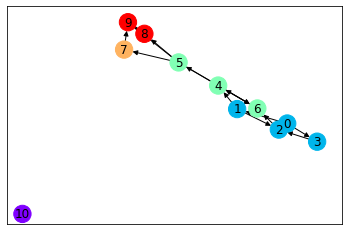


# SCC (kosaraju: 5
SCC labels (kosaraju): [1, 1, 1, 1, 2, 2, 2, 3, 4, 4, 0]


In [4]:
#-----------------------------Testing SCC algorithms and visualization on small examples-------------------------------------------------------
# Create a graph given in the above diagram 
g1 = Graph(5) 
g1.addEdge(1, 0) 
g1.addEdge(0, 2) 
g1.addEdge(2, 1) 
g1.addEdge(0, 3) 
g1.addEdge(3, 4) 


print ("G=(V,E), V=" + str(g1.V)+ ", E=" +str(g1.E))
g1.display()
print(g1.graph)
print("Computing SCC's...")

g1.findSCCs_kosaraju() 
g1.display()

print ("\n# SCC (korasaju): "+str(g1.c))
print ("SCC labels (korasaju): "+str(g1.label))



#------------------------------------------------------------------------------------------
g2=Graph (11) 

g2.addEdge(0,1);g2.addEdge(0,3); 
g2.addEdge(1,2);g2.addEdge(1,4); 
g2.addEdge(2,0);g2.addEdge(2,6); 
g2.addEdge(3,2); 
g2.addEdge(4,5);g2.addEdge(4,6); 
g2.addEdge(5,6);g2.addEdge(5,7);g2.addEdge(5,8);g2.addEdge(5,9); 
g2.addEdge(6,4); 
g2.addEdge(7,9); 
g2.addEdge(8,9); 
g2.addEdge(9,8); 

print ("\n-----------------------------------------------------------")
print ("G=(V,E), V=" + str(g2.V)+ ", E=" +str(g2.E))

g2.display()


print("Computing SCC's...")

g2.findSCCs_kosaraju() 
g2.display()

print("\n# SCC (kosaraju: "+str(g2.c))
print ("SCC labels (kosaraju): "+str(g2.label))






###                                                            FINDING SCC'S ON REAL DATA

-----------------------------------------------------------
twit: G=(V,E), V=80, E= 96


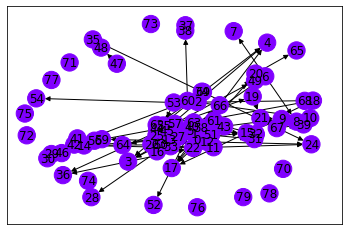

79  
78  
77  
76  
75  
74  
73  
72  
71  
70  
69  
68  
67  
63  
61  
60  
58  
57  
56  
53  
55  
54  
51  
49  
47  
48  
43  
44  
45  
62  
41  
42  
37  
38  
34  
35  
33  
31  
32  
29  
27  
28  
25  
26  
19  
21  
20  
65  
13  
16  
11  
12  
59  
6  
8 39  
7  
2  
0 5 1 17 15 22 3 23 50 64 66 40  
4  
24  
14  
46  
30  
36  
18  
9  
10  
52  


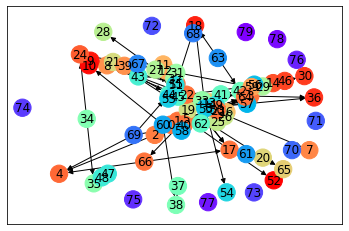


# SCC (kosaraju): 68
runtime =0 ms


In [5]:
#-------------------------------------------FINDING SCC's on real data-------------------------------------------------------

#sys.setrecursionlimit(10**6) #Necessary to not exceed max recursion depth on big datasets!
file_name = 'twit'
file_type='.txt'
skip=4 #number of lines to skip when reading text file
nodes = 80
#----------------------------------------LOAD DATA AND BUILD GRAPH---------------------------------------------------
node_ind = dict() 
ind=0

g2 = Graph(nodes) 
#read file 
f=open(file_name+file_type,'r') 
lines = f.readlines()[skip:]

for line in lines:
    p = line.split()
    
    if not(int(p[0]) in node_ind.keys()): 
        node_ind[int(p[0])]=ind
        ind+=1
    if not(int(p[1]) in node_ind.keys()): 
        node_ind[int(p[1])]=ind
        ind+=1    
    ind1=node_ind[int(p[0])]
    ind2=node_ind[int(p[1])]
    g2.addEdge(ind1,ind2)   
f.close() 
print ("-----------------------------------------------------------")
print (file_name+": G=(V,E), V="+ str(nodes)+", E= " +str(g2.E))
#-----------------------------------------FIND SCC's-----------------------------------------
g2.display()
start=time()
g2.findSCCs_kosaraju()
stop=time()
g2.display()
print ("\n# SCC (kosaraju): "+str(g2.c))
print('runtime ='+str(round((stop-start)*1000.0))+" ms")


